# Fundamentos em Data Science - Udacity - Projeto 2
## Autor: Ricardo Martins da Silva
### Setembro/2018

 ## Dataset utilizado neste projeto: 
<p>&emsp;&emsp;&emsp;&emsp;Para este projeto foram utilizados os dados do Titanic, que contém dados demográficos e informações de 891 dos 2.224 passageiros e tripulantes a bordo da embarcação.
https://www.kaggle.com/c/titanic

<img src="http://4.bp.blogspot.com/-GpsIfr1mKuw/UEC9_4cPh1I/AAAAAAAAAhQ/vIW2I2qvgcE/s1600/titanic11.jpg" alt="titanic" title="Titanic" />



<p>&emsp;&emsp;&emsp;&emsp;O RMS Titanic foi um navio de passageiros britânico operado pela White Star Line e construído pelos estaleiros da Harland and Wolff em Belfast. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic. Projetado pelos engenheiros navais Alexander Carlisle e Thomas Andrews, sua construção começou em março de 1909 e ele foi lançado ao mar em maio de 1911. O Titanic foi pensado para ser o navio mais luxuoso e mais seguro de sua época, gerando lendas que era supostamente "inafundável".</p>

<p>&emsp;&emsp;&emsp;&emsp;A embarcação partiu em sua viagem inaugural de Southampton para Nova Iorque em 10 de abril de 1912, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às 23h40min do dia 14 de abril e afundou na madrugada do dia seguinte com mais de 1 500 pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história. Seu naufrágio destacou vários pontos fracos de seu projeto, deficiências nos procedimentos de evacuação de emergência e falhas nas regulamentações marítimas da época. Comissões de inquérito foram instauradas nos Estados Unidos e no Reino Unido, levando a mudanças nas leis internacionais de navegação que permanecem em vigor mais de um século depois.</p>

&emsp;&emsp;&emsp;&emsp;Os destroços do Titanic foram procurados por décadas até serem encontrados em 1985 por uma equipe liderada por Robert Ballard. Ele se encontra a 3843 m de profundidade e a 650 km ao sudeste de Terra Nova no Canadá. Sua história e naufrágio permaneceram no imaginário popular durante décadas, levando a produção de vários livros e filmes a seu respeito, mais notavelmente o filme Titanic de 1997. Até hoje o Titanic permanece como um dos navios mais famosos da história, com seus destroços atraindo várias expedições de exploração ao longo dos anos.

Fonte: Wikipédia, a enciclopédia livre.

&emsp;&emsp;&emsp;&emsp;O objetivo desse estudo será realizar de uma investigação baseado na análise exploratória do conjunto de dados  mencionado acima, na tentativa de saber se alguns grupos de pessoas tiveram maior chance de sobrevivência que outros. Como por exemplo, poderíamos tentar responder as seguintes perguntas:
&emsp;&emsp;&emsp;&emsp;<li>O sexo da pessoa foi determinante para que houvesse uma maior chance de sobrevivência?
&emsp;&emsp;&emsp;&emsp;<li>Crianças tiveram uma maior probalilidade de sobrevivência?
&emsp;&emsp;&emsp;&emsp;<li>A classe dos passageiros influenciou na chance de sobrevivência?


### Importação dos pacotes necessários:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
% matplotlib inline

### Carregando os dados 

In [2]:
# criando uma função para ler o dataset
def read_data(data):
    df = pd.read_csv(data)
    return df

### Criação do objeto que irá armazenar os dados

In [3]:
titanic = read_data('titanic-data-6.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Lista das colunas:

In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

tipos de dados que cada coluna armazena:

In [5]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Descrição das variáveis do dataset :

* PassengerId: ID de identificação dos passageiros.  
* Survived: sobreviveu (0: "Não"; 1: "Sim")       
* Pclass: classe do passageiro (1: "Primeira",2: "Segunda",3: "Terceira")          
* Name: nome do passageiro           
* Sex: sexo do passageiro            
* Age: idade em anos           
* SibSp: número de irmãos/cônjuges a bordo           
* Parch: número de pais/filhos a bordo     
* Ticket: código do bilhete de passagem         
* Fare: preço da passagem   
* Cabin: cabine          
* Embarked: local de embarque (C:Cherbourg, Q:Queenstown ou S:Southampton)       

Transformação das variáveis 'Survived', 'Pclass' e 'Sex', de modo que ocorra um maior entendimento das mesmas:

In [6]:
lab = {"Survived": {0:"Não", 1:"Sim"},
          "Pclass": {1:"Primeira", 2:"Segunda", 3:"Terceira"},
          "Sex": {"male":"Masculino","female":"Feminino"}}

In [7]:
titanic.replace(lab,inplace = True)

Confirmação das alterações realizadas no dataset original:

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,Não,Terceira,"Braund, Mr. Owen Harris",Masculino,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Sim,Primeira,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Feminino,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Sim,Terceira,"Heikkinen, Miss. Laina",Feminino,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Sim,Primeira,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Feminino,35.0,1,0,113803,53.1000,C123,S
4,5,Não,Terceira,"Allen, Mr. William Henry",Masculino,35.0,0,0,373450,8.0500,NaN,S


## EDA (Análise Exploratória do conjunto de dados) :

In [9]:
print("O conjunto de dados possui {0} registros e {1} colunas(variáveis).".format(titanic.shape[0],titanic.shape[1]))

O conjunto de dados possui 891 registros e 12 colunas(variáveis).


Verificando a presença de valores nulos no dataset:

In [10]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<p>Observa-se a presença de 177 valores nulos na variável 'Age', 687 na variável 'Cabin' e 2 na variável 'Embarked'.</p>
<p>Para resolver o problema dos valores nulos na variável 'Age', optei por substituí-los pela idade mediana, tendo em vista que o valor mediano não sofre influência dos valores extremos. </p>
<p>Optei por não tratar os outros valores nulos tendo em vista que não irei utilizar as variáveis 'Cabin' e 'Embarked' nesta análise.

Substituição dos valores nulos da coluna 'Age' (idade) pelo seu valor mediano:

In [11]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

Cálculo da idade média, máxima e mínima dos passageiros:

In [12]:
print('A idade média dos passageiros era de {} anos.'.format(round(titanic.Age.mean(),1)))
print('O passageiro de idade mais alta tinha {} anos de idade.'.format(titanic.Age.max()))
print('O passageiro de idade mais baixa tinha {} anos de idade.'.format(titanic.Age.min()))

A idade média dos passageiros era de 29.4 anos.
O passageiro de idade mais alta tinha 80.0 anos de idade.
O passageiro de idade mais baixa tinha 0.42 anos de idade.


Análise geral do total de sobreviventes: 

In [13]:
print('Total de passageiros:',titanic.PassengerId.count())
print("Total de Sobreviventes:",titanic.Survived.value_counts()[1])
print("Total de Não Sobreviventes:",titanic.Survived.value_counts()[0])

Total de passageiros: 891
Total de Sobreviventes: 342
Total de Não Sobreviventes: 549


Gráficos com a visão geral dos sobreviventes

Text(0.5,0,'Sobreviveu')

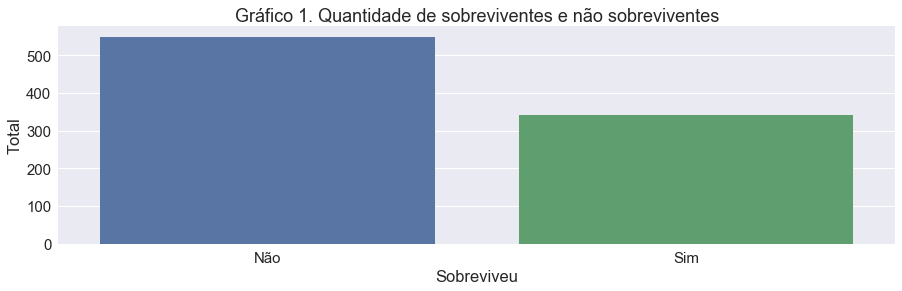

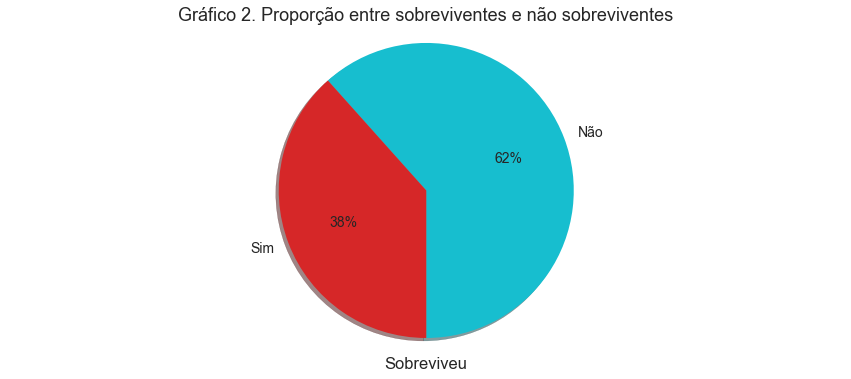

In [84]:
# gráfico do total.
plt.subplots(figsize=(15,4))
sns.set_style(style='darkgrid')
sns.set(font_scale=1.5)
sns.countplot(x="Survived",data=titanic)
plt.title('Gráfico 1. Quantidade de sobreviventes e não sobreviventes')
plt.xlabel('Sobreviveu')
plt.ylabel('Total')

# gráfico da proporção.
plt.subplots(figsize=(15,6))
titanic.Survived.value_counts().plot(kind='pie', autopct='%.0f%%',colors=('tab:cyan','tab:red'),
                                     fontsize = 14,startangle=270,shadow = True)
plt.title('Gráfico 2. Proporção entre sobreviventes e não sobreviventes',fontsize = 18)
plt.axis('equal') 
plt.ylabel('')
plt.xlabel('Sobreviveu')

&emsp;&emsp;&emsp;&emsp;Podemos verificar nos gráficos 1 e 2 que apenas 38% do total de passageiros constantes no dataset estudado, conseguiu sobreviver ao naufrágio.

## Estudo da variável sexo:

Gráfico da proporção de passageiros por sexo

Text(0.5,0,'')

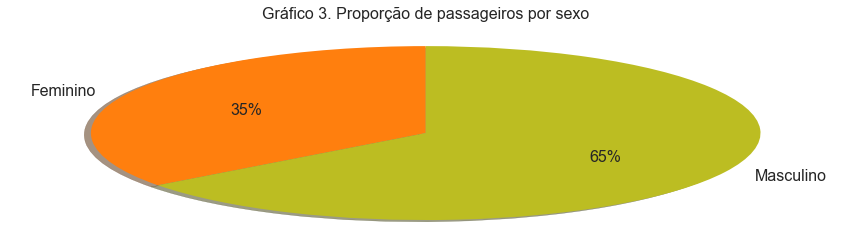

In [15]:
sexo = titanic.groupby('Sex').count()['PassengerId']
plt.subplots(figsize=(15,4))
sexo.plot.pie(autopct='%.0f%%',fontsize = 16,startangle=90,shadow = True,colors=('tab:orange','tab:olive'))
plt.title('Gráfico 3. Proporção de passageiros por sexo',fontsize = 16)
plt.ylabel('')
plt.xlabel('')

Análise do total de passageiros sobreviventes em relação ao sexo:

In [16]:
print('Total de passageiros do sexo masculino:' ,titanic.Sex.value_counts()['Masculino'])
print('Total de passageiros do sexo masculino sobrevivente:', titanic[titanic.Sex == 'Masculino'].Survived.value_counts()['Sim'])
print('Total de passageiros do sexo masculino não sobrevivente:', titanic[titanic.Sex == 'Masculino'].Survived.value_counts()['Não'])
print('\nTotal de passageiros do sexo feminino:' ,titanic.Sex.value_counts()['Feminino'])
print('Total de passageiros do sexo feminino sobrevivente:', titanic[titanic.Sex == 'Feminino'].Survived.value_counts()['Sim'])
print('Total de passageiros do sexo feminino não sobrevivente:', titanic[titanic.Sex == 'Feminino'].Survived.value_counts()['Não'])
print('\nPercentual de sobrevivência do sexo masculino:',round((titanic[titanic.Sex == 'Masculino'].Survived.value_counts()['Sim']/
                                                           titanic.Sex.value_counts()['Masculino']),2)*100,'%.')
print('Percentual de sobrevivência do sexo feminino:',round((titanic[titanic.Sex == 'Feminino'].Survived.value_counts()['Sim']/
                                                           titanic.Sex.value_counts()['Feminino']),2)*100,'%.')

Total de passageiros do sexo masculino: 577
Total de passageiros do sexo masculino sobrevivente: 109
Total de passageiros do sexo masculino não sobrevivente: 468

Total de passageiros do sexo feminino: 314
Total de passageiros do sexo feminino sobrevivente: 233
Total de passageiros do sexo feminino não sobrevivente: 81

Percentual de sobrevivência do sexo masculino: 19.0 %.
Percentual de sobrevivência do sexo feminino: 74.0 %.


Criação de gráfico para uma melhor visualização dos dados acima:

Text(0.5,0,'Sexo')

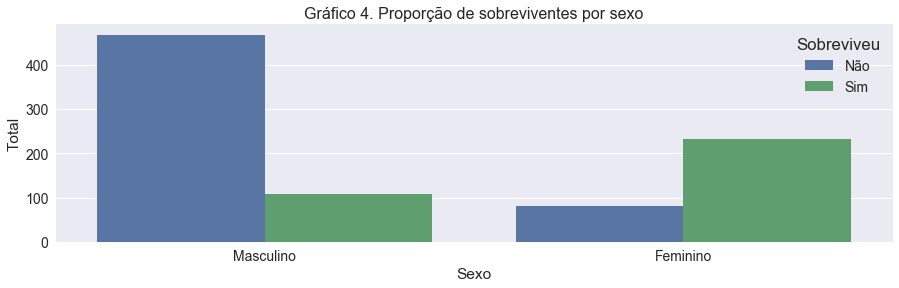

In [17]:
plt.subplots(figsize=(15,4))
ax=sns.countplot(x="Sex",hue = "Survived",data=titanic)
l = ax.legend()
l.set_title('Sobreviveu')
plt.title('Gráfico 4. Proporção de sobreviventes por sexo',fontsize = 16)
plt.ylabel('Total')
plt.xlabel('Sexo')

&emsp;&emsp;&emsp;&emsp;Na análise dos números acima e do gráfico 4, podemos constatar que, apesar da população masculina ser maioria (cerca de 65% do total), apenas 19% conseguiu sobreviver. Enquanto que 74% do total da população feminina sobreviveu.

Text(0.5,0,'Sobreviveu')

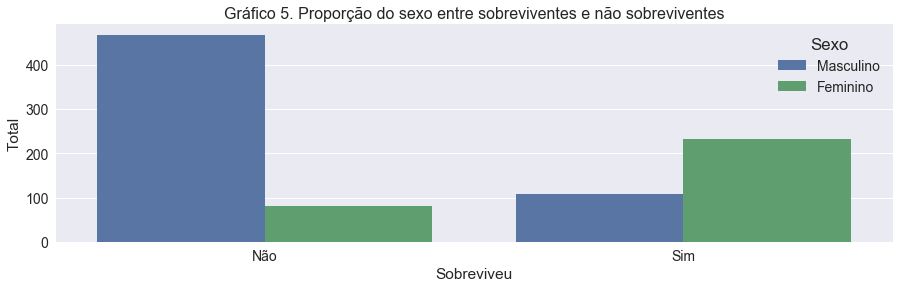

In [18]:
plt.subplots(figsize=(15,4))
ax=sns.countplot(x="Survived",hue = "Sex",data=titanic)
l = ax.legend()
l.set_title('Sexo')
plt.title('Gráfico 5. Proporção do sexo entre sobreviventes e não sobreviventes',fontsize = 16)
plt.ylabel('Total')
plt.xlabel('Sobreviveu')

In [19]:
print('Proporção do sexo masculino, dentre os sobreviventes:'
    ,round(titanic[titanic.Survived == 'Sim'].Sex.value_counts()['Masculino']/titanic.Survived.value_counts()['Sim']*100),'%.')
print('Proporção do sexo feminino, dentre os sobreviventes:'
    ,round(titanic[titanic.Survived == 'Sim'].Sex.value_counts()['Feminino']/titanic.Survived.value_counts()['Sim']*100),'%.')

Proporção do sexo masculino, dentre os sobreviventes: 32.0 %.
Proporção do sexo feminino, dentre os sobreviventes: 68.0 %.


&emsp;&emsp;&emsp;&emsp;Através da análise do gráfico 5, verificamos que do total de passageiros que sobreviveu, 68% deles era do sexo feminino. O que nos leva a crer que, possivelmente, houve uma prioridade para que as mulheres desembarcassem primeiro.

## Estudo da variável Pclass (classe do passageiro)

Quantidade de passageiros por classe:

In [20]:
print('Total de passageiros da primeira classe:' ,titanic.Pclass.value_counts()['Primeira'])
print('Total de passageiros da segunda classe:' ,titanic.Pclass.value_counts()['Segunda'])
print('Total de passageiros da terceira classe:' ,titanic.Pclass.value_counts()['Terceira'])

Total de passageiros da primeira classe: 216
Total de passageiros da segunda classe: 184
Total de passageiros da terceira classe: 491


Gráfico do total de passageiros por classe:

Text(0.5,0,'Classes')

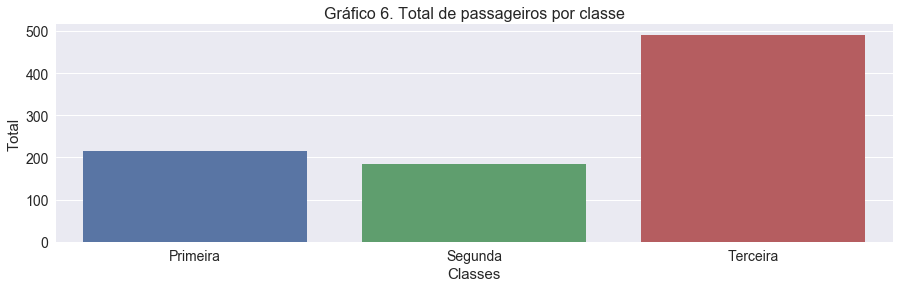

In [21]:
plt.subplots(figsize=(15,4))
sns.countplot(x="Pclass",data=titanic, order = ('Primeira','Segunda','Terceira'))
plt.title('Gráfico 6. Total de passageiros por classe',fontsize = 16)
plt.ylabel('Total',fontsize = 15)
plt.xlabel('Classes',fontsize = 15)

Gráfico da proporção de passageiros por classe:

Text(0.5,0,'')

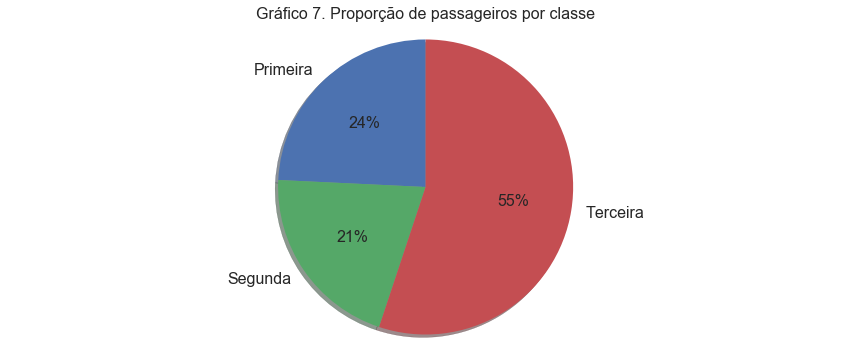

In [22]:
classe = titanic.groupby('Pclass').count()['PassengerId']
plt.subplots(figsize=(15,6))
classe.plot.pie(autopct='%.0f%%',fontsize = 16,startangle=90,shadow = True)
plt.title('Gráfico 7. Proporção de passageiros por classe',fontsize = 16)
plt.axis('equal') 
plt.ylabel('')
plt.xlabel('')

Text(0.5,0,'Classes')

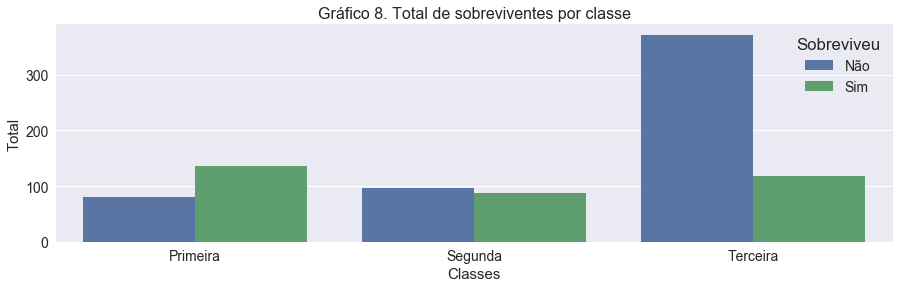

In [23]:
# total de passageiros da primeira classe que sobreviveram
plt.subplots(figsize=(15,4))
ax = sns.countplot(x="Pclass",hue = 'Survived',data=titanic, order = ('Primeira','Segunda','Terceira'))
l = ax.legend()
l.set_title('Sobreviveu')
plt.title('Gráfico 8. Total de sobreviventes por classe',fontsize = 16)
plt.ylabel('Total',fontsize = 15)
plt.xlabel('Classes',fontsize = 15)

In [24]:
print('Total de passageiros da primeira classe:' ,titanic.Pclass.value_counts()['Primeira'])
print('Total de passageiros da primeira classe sobreviventes:', titanic[titanic.Pclass == 'Primeira'].Survived.value_counts()['Sim'])
print('Total de passageiros da primeira classe não sobreviventes:', titanic[titanic.Pclass == 'Primeira'].Survived.value_counts()['Não'])
print('\nTotal de passageiros da segunda classe:' ,titanic.Pclass.value_counts()['Segunda'])
print('Total de passageiros da segunda classe sobreviventes:', titanic[titanic.Pclass == 'Segunda'].Survived.value_counts()['Sim'])
print('Total de passageiros da segunda classe não sobreviventes:', titanic[titanic.Pclass == 'Segunda'].Survived.value_counts()['Não'])
print('\nTotal de passageiros da terceira classe:' ,titanic.Pclass.value_counts()['Terceira'])
print('Total de passageiros da terceira classe sobreviventes:', titanic[titanic.Pclass == 'Terceira'].Survived.value_counts()['Sim'])
print('Total de passageiros da terceira classe não sobreviventes:', titanic[titanic.Pclass == 'Terceira'].Survived.value_counts()['Não'])

Total de passageiros da primeira classe: 216
Total de passageiros da primeira classe sobreviventes: 136
Total de passageiros da primeira classe não sobreviventes: 80

Total de passageiros da segunda classe: 184
Total de passageiros da segunda classe sobreviventes: 87
Total de passageiros da segunda classe não sobreviventes: 97

Total de passageiros da terceira classe: 491
Total de passageiros da terceira classe sobreviventes: 119
Total de passageiros da terceira classe não sobreviventes: 372


Percentuais de sobrevivência por classe:

In [25]:
print('\nPercentual de sobrevivência da primeira classe:',round((titanic[titanic.Pclass == 'Primeira'].Survived.value_counts()['Sim']/
                                                           titanic.Pclass.value_counts()['Primeira']),2)*100,'%.')
print('\nPercentual de sobrevivência da segunda classe:',round((titanic[titanic.Pclass == 'Segunda'].Survived.value_counts()['Sim']/
                                                           titanic.Pclass.value_counts()['Segunda']),2)*100,'%.')
print('\nPercentual de sobrevivência da terceira classe:',round((titanic[titanic.Pclass == 'Terceira'].Survived.value_counts()['Sim']/
                                                           titanic.Pclass.value_counts()['Terceira']),2)*100,'%.')


Percentual de sobrevivência da primeira classe: 63.0 %.

Percentual de sobrevivência da segunda classe: 47.0 %.

Percentual de sobrevivência da terceira classe: 24.0 %.


Gráfico da proporção entre as classes dos sobreviventes:


Text(0.5,0,'')

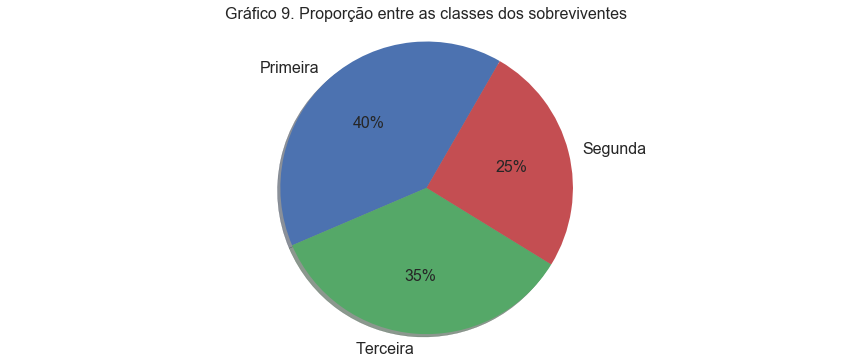

In [26]:
sclasse = titanic[titanic.Survived == 'Sim'].Pclass.value_counts()
plt.subplots(figsize=(15,6))
sclasse.plot.pie(autopct='%.0f%%',fontsize = 16,startangle=60,shadow = True)
plt.title('Gráfico 9. Proporção entre as classes dos sobreviventes',fontsize = 16)
plt.axis('equal') 
plt.ylabel('')
plt.xlabel('')

&emsp;&emsp;&emsp;&emsp;Analisando os gráficos 7 e 9, percebemos que apesar do número total de passageiros da terceira classe ser maioria (55%) , percebe-se que, dos sobreviventes, 40% pertenceu a primeira classe, enquanto que 25% pertenceu à segunda.

Análise da composição das classes em relação ao sexo:

Tabela 1. Total de homens e mulheres por classe

In [27]:
titanic.pivot_table('PassengerId',['Pclass'],'Sex',aggfunc='count')

Sex,Feminino,Masculino
Pclass,,
Primeira,94,122
Segunda,76,108
Terceira,144,347


Gráfico da proporção entre as homens e mulheres por classe

Text(0.5,0,'Quantidade')

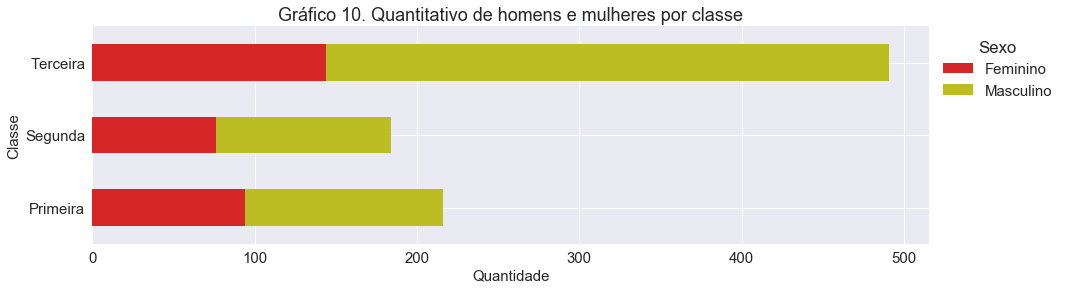

In [28]:
titanic.pivot_table('PassengerId',['Pclass'],'Sex',aggfunc='count').sort_index().plot(kind='barh',
                                                                                      color=('tab:red','tab:olive'),
                                                                                      stacked=True,
                                                                   figsize=(15,4),fontsize = 15).legend(bbox_to_anchor=(1.0,1.0),fontsize = 15).set_title('Sexo')
                                                                                    
plt.title('Gráfico 10. Quantitativo de homens e mulheres por classe',fontsize = 18)
plt.ylabel('Classe',fontsize = 15)
plt.xlabel('Quantidade',fontsize = 15)

&emsp;&emsp;&emsp;&emsp;Verifica-se no gráfico acima que o total de homens é predominante em todas as classes.

Estudo da relação entre sobreviventes, classe e sexo:

Tabela 2. Total de sobreviventes e não sobreviventes por classe e sexo

In [29]:
titanic.pivot_table('PassengerId',['Pclass','Survived'],'Sex',aggfunc='count')

Sex                Feminino  Masculino
Pclass   Survived                     
Primeira Não              3         77
         Sim             91         45
Segunda  Não              6         91
         Sim             70         17
Terceira Não             72        300
         Sim             72         47

Confecção de gráficos para melhor compreensão dos dados acima

Text(0.5,0,'Quantidade')

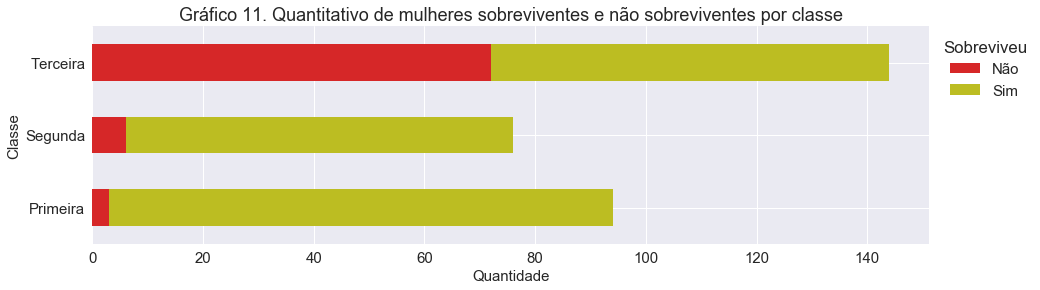

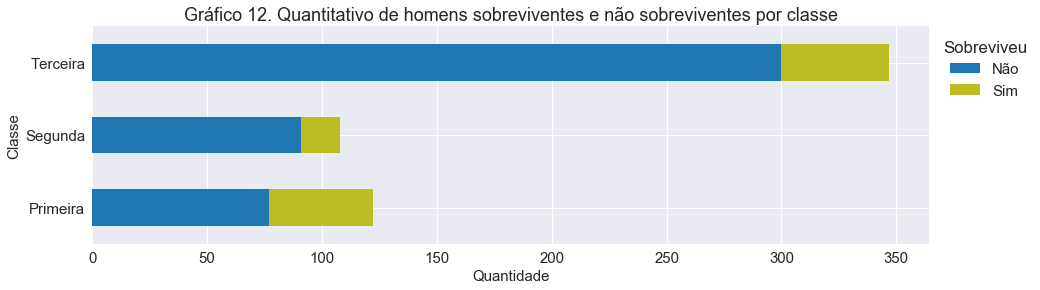

In [30]:
# Feminino
titanic[titanic['Sex']=='Feminino'].pivot_table('PassengerId',['Pclass'],
                                                'Survived',aggfunc='count').sort_index().plot(kind='barh',
                                                                                      color=('tab:red',
                                                                                             'tab:olive'),
                                                                                      stacked=True,
                                                                                      figsize=(15,4),
                                                                                      fontsize = 15).legend(bbox_to_anchor=(1.0,1.0),
                                                                                                            fontsize = 15).set_title('Sobreviveu')
                                                                                    
plt.title('Gráfico 11. Quantitativo de mulheres sobreviventes e não sobreviventes por classe',fontsize = 18)
plt.ylabel('Classe',fontsize = 15)
plt.xlabel('Quantidade',fontsize = 15)


# Masculino
titanic[titanic['Sex']=='Masculino'].pivot_table('PassengerId',['Pclass'],
                                                'Survived',aggfunc='count').sort_index().plot(kind='barh',
                                                                                      color=('tab:blue',
                                                                                             'tab:olive'),
                                                                                      stacked=True,
                                                                                      figsize=(15,4),
                                                                                      fontsize = 15).legend(bbox_to_anchor=(1.0,1.0),
                                                                                                            fontsize = 15).set_title('Sobreviveu')
                                                                                    
plt.title('Gráfico 12. Quantitativo de homens sobreviventes e não sobreviventes por classe',fontsize = 18)
plt.ylabel('Classe',fontsize = 15)
plt.xlabel('Quantidade',fontsize = 15)

&emsp;&emsp;&emsp;&emsp;Através da análise da tabelas 1, tabela 2 e do gráfico 11, observamos que o percentual de sobrevivência de mulheres pertencentes à primeira e segunda classes foi próxima a 100%, enquanto que em relação à terceira classe, o mesmo percentual caiu para 50%.

&emsp;&emsp;&emsp;&emsp;Observa-se ainda que a proporção de homens sobreviventes foi um pouco maior na primeira classe.

In [31]:
titanic[titanic['Survived']=='Sim'].pivot_table('PassengerId',['Sex'],'Pclass',aggfunc='count')

Pclass,Primeira,Segunda,Terceira
Sex,,,
Feminino,91,70,72
Masculino,45,17,47


Text(0.5,0,'Sexo')

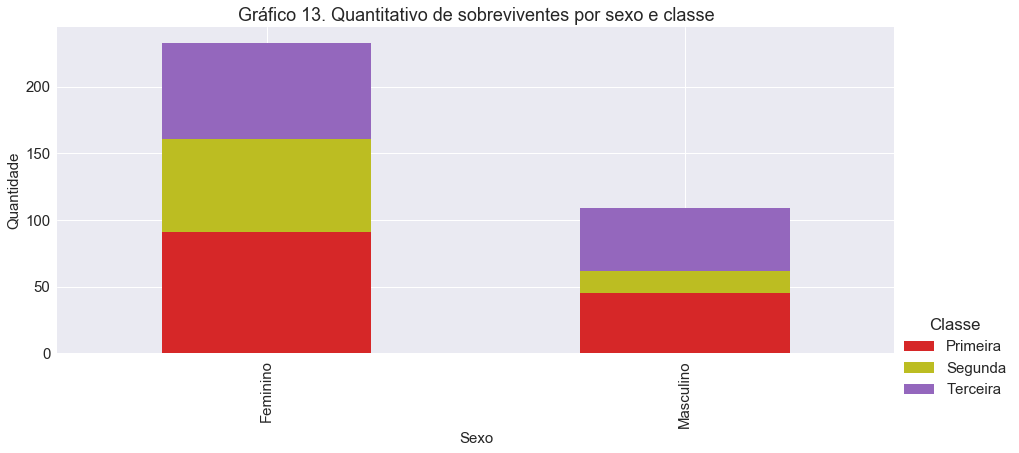

In [32]:
titanic[titanic['Survived']=='Sim'].pivot_table('PassengerId',['Sex'],'Pclass',aggfunc='count').sort_index().plot(kind='bar',
                                                                                      color=('tab:red',
                                                                                             'tab:olive',
                                                                                             'tab:purple'),
                                                                                      stacked=True,
                                                                                      figsize=(15,6),
                                                                                      fontsize = 15).legend(bbox_to_anchor=(1.15,0.15),
                                                                                                            fontsize = 15).set_title('Classe')
plt.title('Gráfico 13. Quantitativo de sobreviventes por sexo e classe',fontsize = 18)
plt.ylabel('Quantidade',fontsize = 15)
plt.xlabel('Sexo',fontsize = 15)

Construção do gráfico com os respectivos percentuais de sobrevivência por sexo e classe:

Text(0.5,0,'')

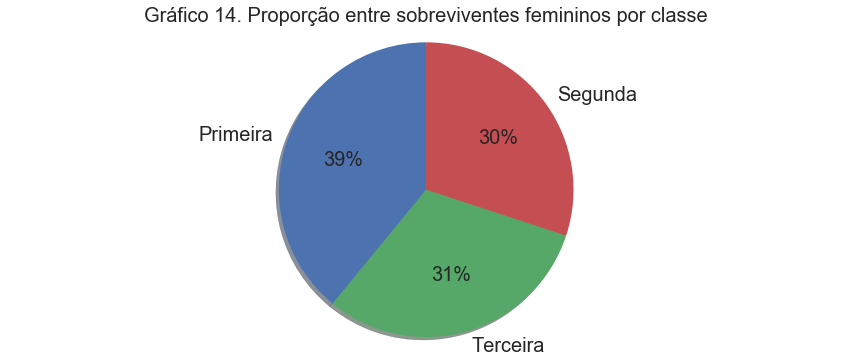

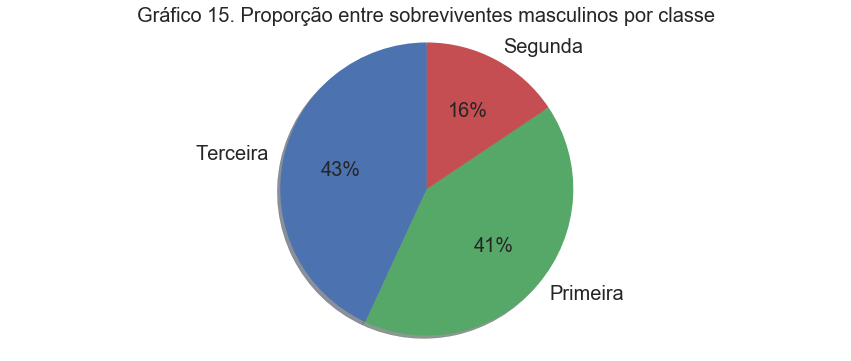

In [33]:
# Criando um subset e um gráfico dos dados em relação ao sexo feminino
dt_fem = titanic[titanic['Sex']=='Feminino']

plt.subplots(figsize=(15,6))
dt_fem[dt_fem['Survived']=='Sim'].Pclass.value_counts().plot(kind='pie', autopct='%.0f%%',
                                     fontsize = 20,startangle=90,shadow = True)
plt.title('Gráfico 14. Proporção entre sobreviventes femininos por classe',fontsize = 20)
plt.axis('equal') 
plt.ylabel('')
plt.xlabel('')

# Criando um subset e um gráfico dos dados em relação ao sexo masculino
dt_masc = titanic[titanic['Sex']=='Masculino']

plt.subplots(figsize=(15,6))
dt_masc[dt_masc['Survived']=='Sim'].Pclass.value_counts().plot(kind='pie', autopct='%.0f%%',
                                     fontsize = 20,startangle=90,shadow = True)
plt.title('Gráfico 15. Proporção entre sobreviventes masculinos por classe',fontsize = 20)
plt.axis('equal') 
plt.ylabel('')
plt.xlabel('')


&emsp;&emsp;&emsp;&emsp;Ao analisar os gráfico 13 e 14, verificamos que do total de sobreviventes do sexo feminino, aquelas que pertenciam à primeira classe foi maioria (39%).

&emsp;&emsp;&emsp;&emsp;Já entre os sobreviventes do sexo masculino, a terceira classe representou a maior parte com cerca de 43% do total.  

## Estudo da variável idade:

Criação de um histograma para visualização da distribuição das idades dos passageiros:

Text(0,0.5,'Quantidade')

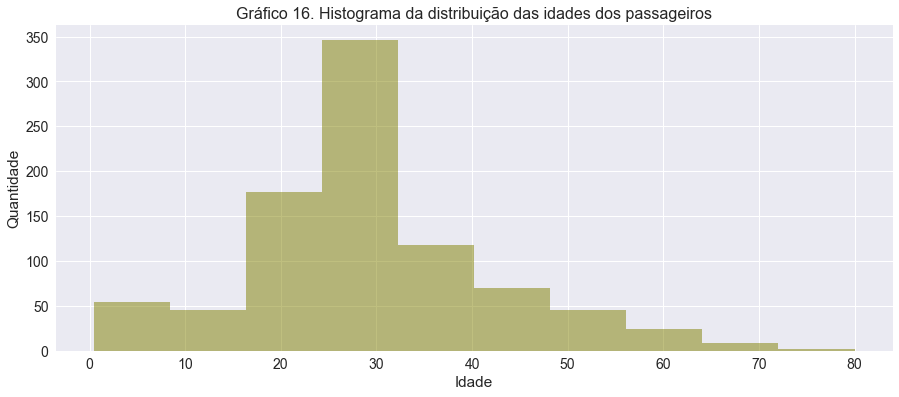

In [34]:
sns.set_style(style='darkgrid')
titanic['Age'].hist(figsize = (15,6),alpha = 0.5,color = 'olive',bins = 10)
plt.title('Gráfico 16. Histograma da distribuição das idades dos passageiros',fontsize = 16)
plt.xlabel('Idade')
plt.ylabel('Quantidade')

&emsp;&emsp;&emsp;&emsp;Observando o histograma acima, percebe-se que a maior parte dos passageiros está concentrada na faixa etária de 18 a 35 anos, que decresce à medida que as idades ficam maiores.  

&emsp;&emsp;&emsp;&emsp;Irei realizar uma análise para verificar o percentual de crianças sobreviventes. Para isso, considerei que todas as pessoas com idade abaixo ou igual a 12 anos, seriam classificadas como criança. Pessoas com idade superiar a 12 anos, classifiquei como adulto.
<p>&emsp;&emsp;&emsp;&emsp;Criei uma nova coluna chamada 'Faixaet' no dataset original, que irá armazenar se o passageiro é 'criança' ou 'adulto', com a finalidade de investigar a sobrevivência das crianças em relação aos adultos.</p> 

Criação da coluna 'Faixaet':

In [35]:
titanic['Faixaet'] = 0 

In [36]:
titanic.loc[titanic[titanic['Age']<=12].index,'Faixaet'] = 'Criança'

In [37]:
titanic.loc[titanic[titanic['Age']>12].index,'Faixaet'] = 'Adulto'

Tabela 3. Total de adultos e crianças

In [38]:
titanic.pivot_table('PassengerId',['Faixaet'],aggfunc='count')

,PassengerId
Faixaet,
Adulto,822
Criança,69


Confecção de gráfico para visualizar a proporção entre crianças e adultos:

Text(0.5,0,'')

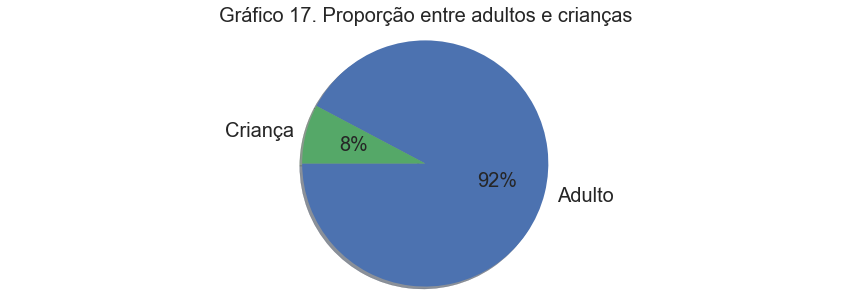

In [39]:
titanic.Faixaet.value_counts().plot(kind='pie', autopct='%.0f%%',
                                     fontsize = 20,startangle=180,shadow = True,figsize = (15,5))
plt.title('Gráfico 17. Proporção entre adultos e crianças',fontsize = 20)
plt.axis('equal') 
plt.ylabel('')
plt.xlabel('')

&emsp;&emsp;&emsp;&emsp;Verificamos a baixa proporção de crianças (apenas 8%) em relação ao total de passageiros, analisando o tabela 3 e o gráfico 16.

Tabela 4. Total de adultos e crianças sobreviventes e não sobreviventes

In [40]:
titanic.pivot_table('PassengerId',['Survived'],'Faixaet',aggfunc='count')


Faixaet,Adulto,Criança
Survived,,
Não,520,29
Sim,302,40


Percentual de crianças e adultos que sobreviveram:

In [81]:
print('Crianças sobreviventes:',round(titanic[titanic['Faixaet']=='Criança'].Survived.value_counts(2)['Sim']*100),'%.')
print('Adultos sobreviventes:',round(titanic[titanic['Faixaet']=='Adulto'].Survived.value_counts(2)['Sim']*100),'%.')

Crianças sobreviventes: 58.0 %.
Adultos sobreviventes: 37.0 %.


Text(0.5,0,'Quantidade')

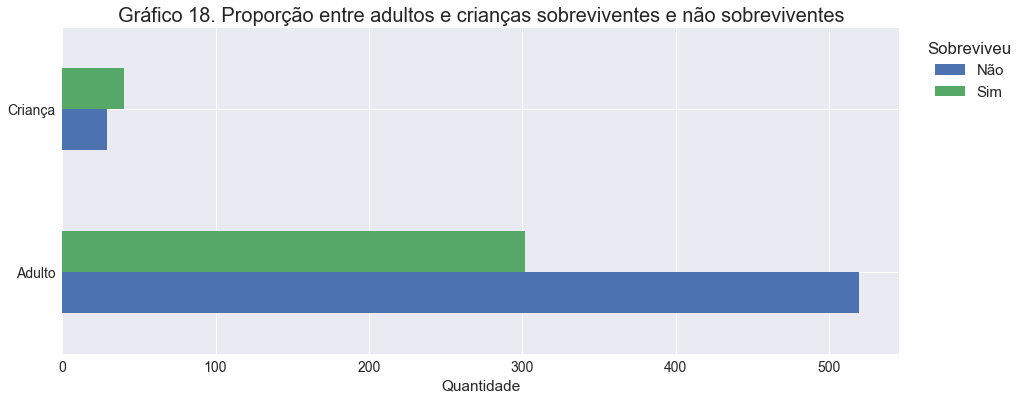

In [42]:
titanic.pivot_table('PassengerId',['Faixaet'],'Survived',
                    aggfunc='count').plot(kind = 'barh',
                                          figsize=(15,6)).legend(bbox_to_anchor=(1.15,1.0),
                                                                 fontsize = 15).set_title('Sobreviveu')
plt.title('Gráfico 18. Proporção entre adultos e crianças sobreviventes e não sobreviventes',fontsize = 20)
plt.ylabel('')
plt.xlabel('Quantidade')

&emsp;&emsp;&emsp;&emsp;Do total de 69 crianças à bordo, 40 delas sobreviveram (aproximadamente 58%), enquanto que do total de 822 adultos, apenas 302 sobreviveu (aproximadamente 37%). 

Tabela 5. Total de adultos e crianças pela classe de passageiro

In [43]:
titanic.pivot_table('PassengerId',['Faixaet'],'Pclass',aggfunc='count')

Pclass,Primeira,Segunda,Terceira
Faixaet,,,
Adulto,212,167,443
Criança,4,17,48


Text(0.5,0,'Quantidade')

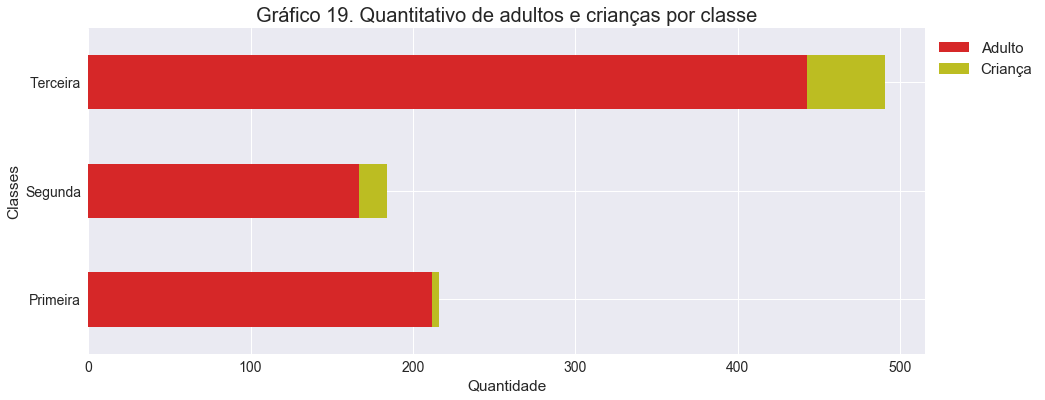

In [44]:
titanic.pivot_table('PassengerId',['Pclass'],'Faixaet',
                    aggfunc='count').plot(kind = 'barh',color=('tab:red','tab:olive'),
                                          figsize=(15,6),
                                          stacked = True).legend(bbox_to_anchor=(1.0,1.0),
                                                                  fontsize = 15).set_title('')
plt.title('Gráfico 19. Quantitativo de adultos e crianças por classe',fontsize = 20)
plt.ylabel('Classes')
plt.xlabel('Quantidade')

Percentual de crianças por classe:

In [78]:
print('Primeira: ',round(titanic[titanic['Pclass']=='Primeira'].Faixaet.value_counts(2)['Criança']*100),'%.')
print('Segunda: ',round(titanic[titanic['Pclass']=='Segunda'].Faixaet.value_counts(2)['Criança']*100),'%.')
print('Terceira: ',round(titanic[titanic['Pclass']=='Terceira'].Faixaet.value_counts(2)['Criança']*100),'%.')

Primeira:  2.0 %.
Segunda:  9.0 %.
Terceira:  10.0 %.


Algumas estatísticas relacionadas à idade: 

In [76]:
print('Idade do passageiro mais novo:',titanic['Age'].min(), 'anos.')
print('Idade do passageiro mais velho:', titanic['Age'].max(), 'anos.')
print('Menor idade do passageiro que sobreviveu:',titanic[titanic['Survived'] == 'Sim']['Age'].min(), 'anos.')
print('Maior idade do passageiro que sobreviveu:',titanic[titanic['Survived'] == 'Sim']['Age'].max(), 'anos.')
print('Menor idade do passageiro que não sobreviveu:',titanic[titanic['Survived'] == 'Não']['Age'].min(), 'anos.')
print('Maior idade do passageiro que não sobreviveu:',titanic[titanic['Survived'] == 'Não']['Age'].max(), 'anos.')
print('Idade media total:', round(titanic['Age'].mean()), 'anos.')
print('Idade media dos sobreviventes:',round(titanic[titanic['Survived'] == 'Sim']['Age'].mean()), 'anos.')
print('Idade media dos não sobreviventes:',round(titanic[titanic['Survived'] == 'Não']['Age'].mean()), 'anos.')

Idade do passageiro mais novo: 0.42 anos.
Idade do passageiro mais velho: 80.0 anos.
Menor idade do passageiro que sobreviveu: 0.42 anos.
Maior idade do passageiro que sobreviveu: 80.0 anos.
Menor idade do passageiro que não sobreviveu: 1.0 anos.
Maior idade do passageiro que não sobreviveu: 74.0 anos.
Idade media total: 29 anos.
Idade media dos sobreviventes: 28 anos.
Idade media dos não sobreviventes: 30 anos.


&emsp;&emsp;&emsp;&emsp;Observa-se que o percentual de crianças que compôs a primeira classe foi bem baixo (aproximadamente 2%). Enquanto que nas segunda e terceira classes, esse percentual ficou em torno de  9 e 10%, respectivamente.

Tabela 6. Sobrevivência de adultos e crianças por classe

In [46]:
titanic.pivot_table('PassengerId',['Pclass','Faixaet'],'Survived',
                    aggfunc='count')

Survived            Não    Sim
Pclass   Faixaet              
Primeira Adulto    79.0  133.0
         Criança    1.0    3.0
Segunda  Adulto    97.0   70.0
         Criança    NaN   17.0
Terceira Adulto   344.0   99.0
         Criança   28.0   20.0

Text(0.5,0,'Quantidade')

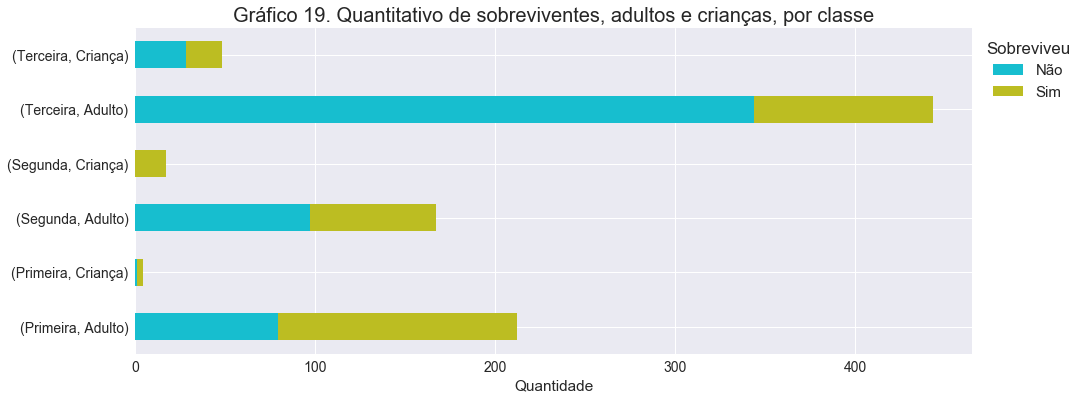

In [47]:
titanic.pivot_table('PassengerId',['Pclass','Faixaet'],'Survived',
                    aggfunc='count').plot(kind = 'barh',color=('tab:cyan','tab:olive'),
                                          figsize=(15,6),
                                          stacked = True).legend(bbox_to_anchor=(1.0,1.0),
                                                                  fontsize = 15).set_title('Sobreviveu')
plt.title('Gráfico 19. Quantitativo de sobreviventes, adultos e crianças, por classe',fontsize = 20)
plt.ylabel('')
plt.xlabel('Quantidade')

&emsp;&emsp;&emsp;&emsp; Em relação à sobrevivência de crianças dentro de suas classes, verificamos que 75% das crianças pertencentes a primeira classe sobreviveu. 100% das que pertenciam a segunda classe sobreviveu. Enquanto que, em relação a terceira classe, 42% sobreviveu.

Criação de um gráfico sobreposto das densidades dos sobreviventes e dos não sobreviventes, com relaçao às idades:

([<matplotlib.axis.XTick at 0x7fa8c33e7278>,
 <a list of 9 Text xticklabel objects>)

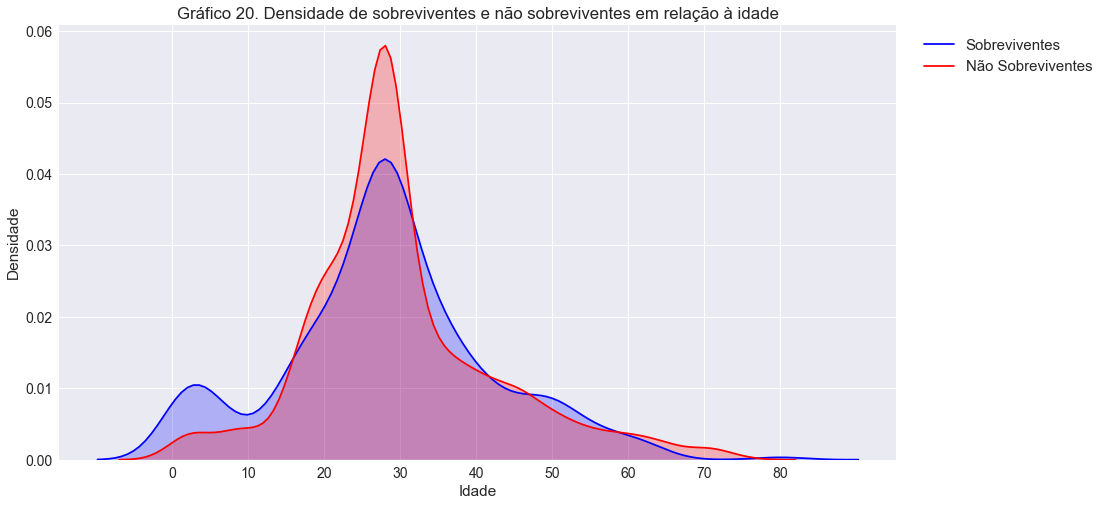

In [48]:
plt.subplots(figsize=(15,8))
ax = sns.kdeplot(titanic[titanic['Survived']=='Sim']['Age'],
                 shade = True, color = "b",label = 'Sobreviventes').legend(bbox_to_anchor=(1.25,1.0),fontsize = 15)
ax = sns.kdeplot(titanic[titanic['Survived']=='Não']['Age'],
                 shade = True, color = "r",label = 'Não Sobreviventes').legend(bbox_to_anchor=(1.25,1.0),fontsize = 15)
plt.title('Gráfico 20. Densidade de sobreviventes e não sobreviventes em relação à idade')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.xticks((0,10,20,30,40,50,60,70,80))

&emsp;&emsp;&emsp;&emsp; Na análise do gráfico de densidades (gráfico 20), podemos observar que passageiroa com idade até 15 anos, aproximadamente, tiveram uma maior chance de sobreviver, tendo em vista a área azul (sobreviventes) se sobrepor a área vermelha (não sobreviventes) nessa faixa etária. 

## Conclusões:

Na tentativa de responder as seguintes indagações:
<li> O sexo da pessoa foi determinante para que houvesse uma maior chance de sobrevivência?
<li> Crianças tiveram uma maior probalilidade de sobrevivência?
<li> A classe dos passageiros influenciou na chance de sobrevivência?
    
Foi realizada uma análise exploratória dos dados necessários a responder tais questionamentos. O que nos permitiu chegar a algumas conclusões:

<p><li>De uma forma geral, podemos constatar que ocorreu um percentual de sobrevivência de apenas 38% dos passageiros.</p>

<p><li>Em relação à idade, a proporção de crianças (considerando passageiros com idade abaixo de 12 anos,inclusive) era de 8% do total de passageiros. Do total de crianças presentes no navio, o percentual de sobrevivência foi de 58%. Enquanto que para os adultos, esse percentual foi de 37%. O que poderia nos levar a crer que as crianças tiveram uma certa prioridade na hora de desembarcar do titanic em naufrágio. </p>
<p>Ainda em relação às idades, verificamos as seguintes informações:</p>
<p><li>&emsp;A idade do passageiro mais novo foi de aproximadamente 5 meses;
 <li>&emsp;A Idade do passageiro mais velho foi de 80 anos.
 <li>&emsp;A Menor idade do passageiro que sobreviveufoi de aproximadamente 5 meses.
 <li>&emsp;A Maior idade do passageiro que sobreviveu foi de 80 anos.
 <li>&emsp;A Menor idade do passageiro que não sobreviveu foi de 1 ano.
 <li>&emsp;A Maior idade do passageiro que não sobreviveu foi de 74 anos.
 <li>&emsp;A Idade media total foi de 29 anos.
 <li>&emsp;A Idade media dos sobreviventes foi de 28 anos.
 <li>&emsp;A Idade media dos não sobreviventes foi de 30 anos.</p>

<p><li> Em relaçao ao estudo da variável sexo, verificou-se que do total de passageiros, 35% era do sexo feminino. Sendo que do total de passageiros femininos, cerca de 74% sobreviveu ao desastre, enquanto que o índice de sobrevivência dos passageiros do sexo masculino foi de apenas 19%. Tal fato corrobora com a tese de que as mulheres, juntamente com as crianças tiveram prioridade na hora de serem colocadas nos botes salva-vida.</p>

<p><li> Foi realizado ainda, estudo em relação à classe dos passageiros. O que ficou evidenciado foi o fato de que se o passageiro fizesse parte da primeira classe, possivelmente, teria uma chance de 63% de sobrevivência. Se pertencesse à segunda, 47% de chance de sobreviver.Enquanto que, se pertencesse a terceira classe, essa chance cairia para 24%. </p>
<p><li> Foi observado ainda, que 100% das crianças pertencentes à segunda classe sobreviveu. 75% das que pertenciam à primeira classe sobreviveu, enquanto que 42% das crianças pertencentes a terceira classe sobreviveu.



## Limitações

<p>&emsp;&emsp;&emsp;Foi percebido que algumas variáveis do dataset original possuiam alguns dados nulos, no caso, as variáveis 'Age', 'Cabin' e 'Embarked'. O que poderiam causar algum tipo de limitação à análise dos dados.</p>
<p>&emsp;&emsp;&emsp;Neste trabalho usei apenas a variável 'Age' dentre as três que continham valores nulos. Para solucionar tal problema, usei a substituição dos valores faltantes pela idade mediana. A opção pela mediana se deu em virtude da mesma ser uma medida de posição central que não sofre influencia dos valores extremos, o que no ocorre com a média.</p>
<p>&emsp;&emsp;&emsp;Para facilitar o processo de análise, alterei a forma de visualização de algumas variáveis. Na variável 'Survived', transformei os valores da seguinte forma: 0:'Não' e 1:'Sim'; para a variável 'Sex', converti para male:'Masculino', 'female':'Feminino'; na variável 'Pclass', usei: '1': 'Primeira','2': 'Segunda','3': 'Terceira'. Criei uma variável chamada 'Faixaet' representando faixas de idade: passageiros com idade até 12 anos,inclusive, chamei de 'Criança', acima de 12 anos, 'Adulto'.   

## Fontes:

* Wikipedia: https://www.wikipedia.org/ 
* Kaggle: https://www.kaggle.com/c/titanic
* python: https://www.python.org/
* Pandas biblioteca para análise de dados: https://pandas.pydata.org/
* Markdown-guide’s documentation: https://markdown-guide.readthedocs.io/en/latest/index.html